## Ethiopian Import Data Analysis (HS Code 3905)
### Objective
This notebook analyzes Ethiopian import data (HS Code 3905) to:

Clean & preprocess the dataset
Explore market trends & insights
Categorize items & traders using AI-based methods
Identify global suppliers using NLP (Named Entity Recognition)


### 1 Data Cleaning & Preprocessing
####  Methodology
Before performing any analysis, we clean and prepare the dataset:

Missing values → Replaced with "Unknown" instead of dropping them.
Date formatting → Converts "Reg. Date (Day/Mon/Year)" to datetime format.
Numerical values → Converts CIF, FOB, weight, and tax values to numeric format.

In [1]:
import pandas as pd
import sys, os
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath('../scripts'))


from data_cleaning import clean_import_data
# Load & clean data
df = clean_import_data(r"C:\Users\Blen\OneDrive\Desktop\Project\LeanDataManagement\data\Import Data Mining.xlsx - Sheet1.csv")

# Save cleaned dataset
df.to_csv(r"C:\Users\Blen\OneDrive\Desktop\Project\LeanDataManagement\data\cleaned_imports.csv", index=False)

# Display first few rows
df.head()

,IMPEX,BANK PERMIT NUMBER,Reg. Date (Day/Mon/Year),TIN,Trader,Trader Address,Item,HS Code,HS Description,Commercial / Brand Name,...,VAT tobe paid (ETB),VAT paid (ETB),WH tax tobe paid (ETB),WH tax paid (ETB),Sur tax tobe paid (ETB),Sur tax paid (ETB),Social Wel Tax tobe paid (ETB),Social Wel Tax paid (ETB),Total tax tobe paid (ETB),Total tax paid (ETB)
0,IM,Unknown,2022-07-15,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,3.0,39053000.0,"- Poly(vinyl alcohol), whether or not containi...",POLYVINYL ALCOHOL GOHSENOL GH 20R ( ),...,26.1,26.1,4.98,4.98,0.0,0.0,0.0,0.0,39.38,39.38
1,IM,ABAIBD01000432023,2023-06-14,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,1.0,39051200.0,-- In aqueous dispersion,HOMOPOLYMER ( ),...,581668.8,581668.8,110794.1,110794.1,0.0,0.0,110794.1,110794.1,987913.8,987913.8
2,IM,OIBIBD01006972023,2023-09-09,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,1.0,39051200.0,-- In aqueous dispersion,HOMOPOLYMER VISICOL 3001 OFF GRADE ( ),...,589354.1,589354.1,112257.9,112257.9,0.0,0.0,112257.9,112257.9,1000966.4,1000966.4
3,IM,ABAIBD01000502023,2023-09-22,0041705943ET02,A F TRADING PLC,14/670/199525/2006 (ADDIS ABABA) (ZN-ARADA WR-...,1.0,39051200.0,-- In aqueous dispersion,HOMOPOLYMER ( ),...,295155.2,295155.2,56220.03,56220.03,0.0,0.0,56220.03,56220.03,501295.31,501295.31
4,IM,UNBUBH01001882022,2022-07-03,0046675365AARI,ABDULAZIZ KEDIR HUSSEIN,29337/07 (ADDIS ABABA) (ZN-AKAKI KALITI WR-NO ...,1.0,39059900.0,-- Other,PP 25KG/BAG ( ),...,569065.3,569065.3,108393.4,0.0,0.0,0.0,0.0,0.0,858114.3,749720.9


### 2️ Exploratory Data Analysis (EDA)
####  Methodology
We analyze:

Summary statistics → Provides key statistics on numerical data.
Import trends over time → Identifies year-wise growth patterns.
Most imported items → Highlights top HS Code descriptions.
Supplier & trader analysis → Understands supplier distribution and trader market share.
Tax structure analysis → Evaluates import duty, VAT, and total tax distribution.

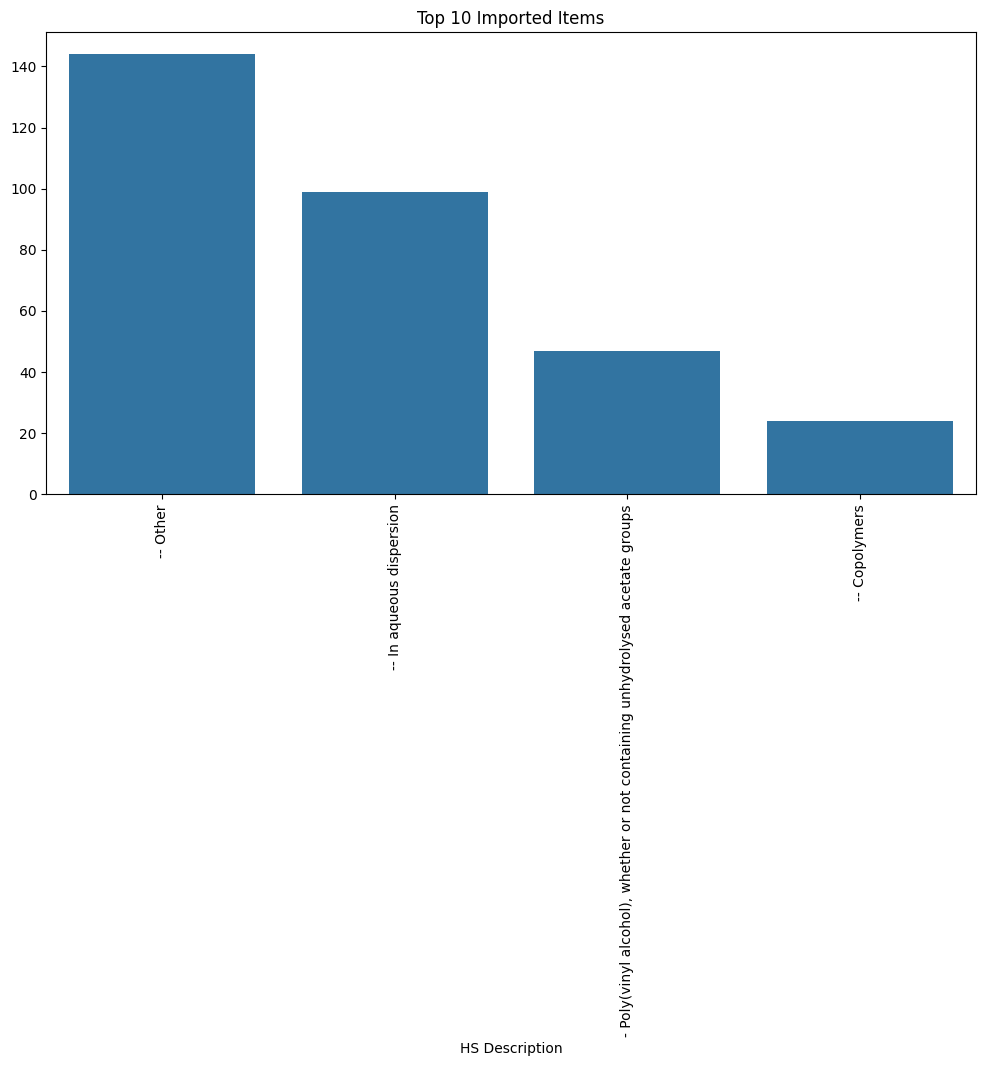

,Item,HS Code,CIF/FOB Value (ETB),FOB (FC),# of packages,MoT Code,Duty tax paid (ETB),Excise tax tobe paid (ETB),Excise tax paid (ETB),VAT tobe paid (ETB),VAT paid (ETB),WH tax tobe paid (ETB),WH tax paid (ETB),Sur tax tobe paid (ETB),Sur tax paid (ETB),Social Wel Tax tobe paid (ETB),Social Wel Tax paid (ETB),Total tax tobe paid (ETB),Total tax paid (ETB)
count,314.000000,3.140000e+02,3.140000e+02,314.000000,314.000000,314.000000,3.140000e+02,314.0,314.0,3.140000e+02,3.140000e+02,314.000000,314.000000,314.0,314.0,314.000000,314.000000,3.140000e+02,3.140000e+02
mean,3.025478,3.905520e+07,2.617225e+06,43733.655318,578.882166,50.398089,1.247116e+05,0.0,0.0,4.115045e+05,4.038632e+05,77302.411178,27603.296975,0.0,0.0,32054.047070,32022.075573,6.517222e+05,5.882002e+05
std,4.413093,3.718374e+03,4.663632e+06,80475.597128,1249.894143,22.823341,2.243371e+05,0.0,0.0,7.348237e+05,7.345376e+05,139255.618859,82751.154545,0.0,0.0,82576.948501,82588.073071,1.146279e+06,1.042181e+06
min,1.000000,3.905120e+07,1.000000e+00,0.400000,1.000000,4.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.300000e-01,0.000000e+00
25%,1.000000,3.905210e+07,9.819625e+04,1575.000000,15.000000,61.000000,7.593500e+02,0.0,0.0,1.484081e+04,1.985625e+03,2815.837500,0.000000,0.0,0.0,0.000000,0.000000,2.322449e+04,7.568917e+03
50%,1.000000,3.905300e+07,9.327670e+05,15400.000000,186.500000,61.000000,4.470885e+04,0.0,0.0,1.469108e+05,1.408329e+05,27835.995000,0.000000,0.0,0.0,0.000000,0.000000,2.355136e+05,1.995095e+05
75%,3.000000,3.905990e+07,2.839227e+06,45846.000000,725.750000,62.000000,1.376321e+05,0.0,0.0,4.471783e+05,4.454064e+05,85036.470000,6857.430000,0.0,0.0,22881.112500,22881.112500,6.830877e+05,6.688903e+05
max,32.000000,3.905990e+07,2.985682e+07,555101.000000,14541.000000,62.000000,1.456500e+06,0.0,0.0,4.702449e+06,4.680057e+06,895704.700000,843262.100000,0.0,0.0,602826.200000,602826.200000,7.090995e+06,6.675825e+06


In [2]:
import pandas as pd
from eda import perform_eda

# Load cleaned data
df = pd.read_csv(r"C:\Users\Blen\OneDrive\Desktop\Project\LeanDataManagement\data\cleaned_imports.csv")

# Perform EDA
summary = perform_eda(df)

# Display summary statistics
summary


In [3]:
from item_categorization import categorize_items

# Categorize items using AI-based clustering
df = categorize_items(df)

# Save categorized data
df.to_csv(r"C:\Users\Blen\OneDrive\Desktop\Project\LeanDataManagement\data\categorized_imports.csv", index=False)

df["Item Category"].head(20)


0     2
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    3
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: Item Category, dtype: int32

In [4]:
from trader_categorization import categorize_traders

# Categorize traders
trader_categories = categorize_traders(df)

trader_categories.head(20)


,Trader,CIF/FOB Value (ETB),Trader Category
0,A E CHEMICALS TRADING PLC,7435231.0,4
1,A F TRADING PLC,1874001.0,0
2,ABDULAZIZ KEDIR HUSSEIN,18659520.0,2
3,ABDUREHMAN ABDULKADIR HUSSEN,6671659.0,4
4,ABDUSELAM AHMED HUSIEN,3404264.0,0
5,ABDUSELAM BEDRU ADEM,5865586.0,4
6,ABEBE GEBRHIWOT MISGUN,2915125.0,0
7,ADIL ABDULHAMID SHASH,7237176.0,4
8,ALHADI MARU LEGAS,1196.0,0
9,AMARE DEMILIE ZEGEYE,29449.0,0


In [5]:
from supplier_analysis import identify_suppliers

# Identify suppliers using NLP
df = identify_suppliers(df)

# Save processed dataset
df.to_csv(r"C:\Users\Blen\OneDrive\Desktop\Project\LeanDataManagement\data\final_imports.csv", index=False)

df["Supplier"].head(20)


0                           Unknown
1                           Unknown
2          HOMOPOLYMER VISICOL 3001
3                           Unknown
4                                PP
5                           Unknown
6                           Unknown
7                             LLDPE
8                             LLDPE
9                           Unknown
10                            LLDPE
11                          Unknown
12                      LLDPE 8420A
13             HDPE 1010J OFF GRADE
14              PPR SM598 OFF GRADE
15                          Unknown
16                      VINAVIL P23
17    REDISPERSIBLE POWDER(ACCURATE
18                          Unknown
19                              VAE
Name: Supplier, dtype: object